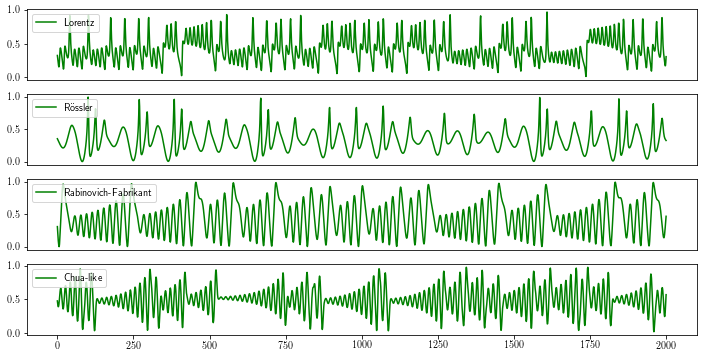

In [3]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['text.usetex'] = True

import pandas as pd
import numpy as np

names = [
    'lorentz1d',
    'rossler1d',
    'rabinovich_fabrikant1d',
    'chua1d',
]
labels = ['Lorentz', r'R\"{o}ssler', 'Rabinovich-Fabrikant', 'Chua-like']
i = 0
plt.figure(figsize=(12,6))
for n in names:
    x = np.loadtxt('dataset/'+n+'.txt', delimiter=',').T
    plt.subplot(4,1,i+1)
    plt.plot(x[:2000], 'g', label=labels[i])
    if i < 3:
        plt.xticks([])
    i = i +1

    plt.legend(loc='upper left') 
    
# plt.savefig('../1dseries.pdf')
plt.show()
